# <span style="color:red"> Plot</span>

<i> Exemples </i> : https://matplotlib.org/gallery/index.html

### <span style="color:blue"> 0. Méthode "propre" d'affichage </span>

In [2]:
import matplotlib.pyplot as plt
import numpy as np

In [43]:
t = np.arange(0.0, 2.0, 0.01)
s = 1 + np.sin(2 * np.pi * t)

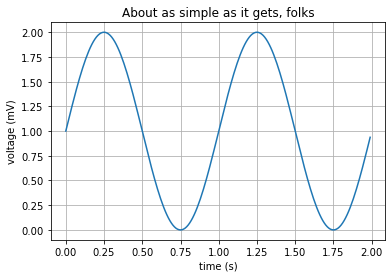

In [44]:
fig, ax = plt.subplots() # ax: objet graph contenant toutes les méthodes
ax.plot(t, s)

ax.set(xlabel='time (s)', ylabel='voltage (mV)',
       title='About as simple as it gets, folks')
ax.grid()

# fig.savefig("test.png") # pour enregistrer

### <span style="color:blue"> 1. Remplir l'aire entre deux courbes </span> <br>
> #### <i> intervalle de confiance </i>

In [92]:
N = 21
x = np.linspace(0, 10, 11)
# xb = np.arange(0, 11, 1) # différence avec linspace : on définit la taille du step, tandis que avec linspace on définit le nb de steps
y = [3.9, 4.4, 10.8, 10.3, 11.2, 13.1, 14.1,  9.9, 13.9, 15.1, 12.5]
print(f'x = {x}')

x = [ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10.]


In [82]:
a, b = np.polyfit(x, y, deg=1)
y_est = a * x + b
y_err = x.std() * np.sqrt(1/len(x) +
                          (x - x.mean())**2 / np.sum((x - x.mean())**2))

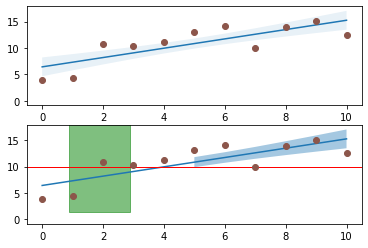

In [84]:
# sans conditions
fig, (ax1, ax2) = plt.subplots(2, 1, sharey = True)
ax1.plot(x, y_est, '-')
ax1.fill_between(x, y_est - y_err, y_est + y_err, alpha=0.1) # alpha : transparence (1 : couleur de y_est)
ax1.plot(x, y, 'o', color='tab:brown')


# avec conditions
ax2.plot(x, y_est, '-')
ax2.fill_between(x, y_est - y_err, y_est + y_err, where=(x>4), alpha=0.4)

# affichage seuil (ligne horizontale)
ax2.axhline(10,color='red', lw=1, alpha = 1.0)

# remplissage complet
ax2.fill_between(x, 0, 1, where=x<2, color = 'green', alpha=0.5, transform=ax.get_xaxis_transform())
ax2.plot(x, y, 'o', color='tab:brown')

### <span style="color:blue"> 2. Plot spéciaux </span> <br>
> #### <i> Stem plot </i>

In [32]:
x = np.linspace(0.1, 2 * np.pi, 41)
y = np.exp(np.sin(x))

<StemContainer object of 3 artists>

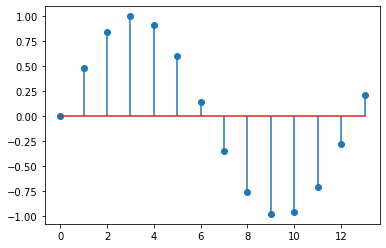

In [45]:
plt.stem(x, y)

> #### <i> Step plot </i>

In [34]:
x = np.arange(14)
y = np.sin(x / 2)

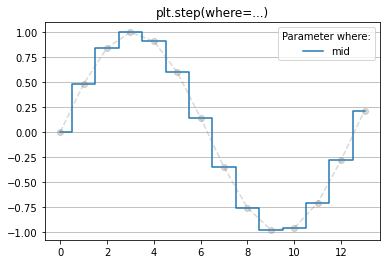

In [42]:
plt.step(x, y, where = 'mid', label = 'mid') # par défaut where = pre
plt.plot(x, y, 'o--', color='grey', alpha=0.3)

plt.grid(axis='y', color='0.7')
plt.legend(title='Parameter where:')
plt.title('plt.step(where=...)')

Text(0.5, 1.0, 'plt.plot(drawstyle=...)')

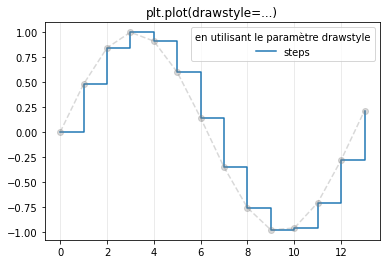

In [40]:
plt.plot(x,y,drawstyle='steps-post', label='steps')
plt.plot(x, y, 'o--', color='grey', alpha=0.3)

plt.grid(axis='x', color='0.90')
plt.legend(title='en utilisant le paramètre drawstyle')
plt.title('plt.plot(drawstyle=...)')

### <span style="color:blue"> 3. Annotations </span> <br>

In [93]:
x = np.arange(0, 10, 0.005)
y = np.exp(-x/2.) * np.sin(2*np.pi*x)

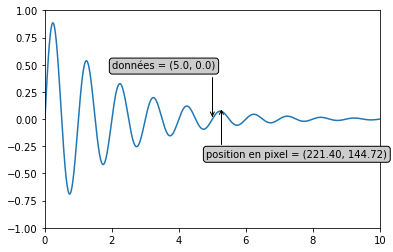

In [114]:
fig, ax = plt.subplots()
ax.plot(x, y)
ax.set_xlim(0, 10)
ax.set_ylim(-1, 1)

xdata, ydata = 5, 0 # coordonnées numériques
xdisplay, ydisplay = ax.transData.transform((xdata, ydata)) # coordonnées en pixel

bbox = dict(boxstyle="round", fc="0.8")
arrowprops = dict(
    arrowstyle="->",
    connectionstyle="angle,angleA=0,angleB=90,rad=10")

offset = 50 # en pixel
ax.annotate(
    f'données = ({xdata:.1f}, {ydata:.1f})',
    (xdata, ydata),
    xytext=(-2*offset, offset), textcoords='offset points',
    bbox=bbox, arrowprops=arrowprops)
ax.annotate(
    f'position en pixel = ({xdisplay:.2f}, {ydisplay:.2f})',
    xy=(xdisplay, ydisplay), xycoords='figure pixels',
    xytext=(-0.3*offset, -offset), textcoords='offset points',
    bbox=bbox, arrowprops=arrowprops)
plt.show()

### <span style="color:blue"> 4. Configuration des axes</span> <br>

([<matplotlib.axis.XTick at 0x195b08682b0>,
 [Text(0, 0, 'a'), Text(1, 0, 'b'), Text(2, 0, 'c'), Text(3, 0, 'd')])

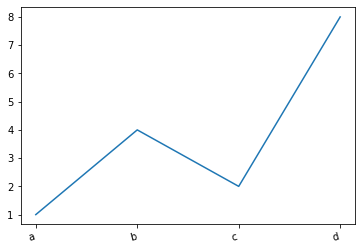

In [3]:
plt.plot([1,4,2,8])
#tick = données affichées sur l'axe considéré, localisées par un trait 
plt.xticks(ticks = range(4), # position des ticks
           labels = ['a', 'b', 'c', 'd'], # noms des ticks
           rotation=15, # rotation (°) des ticks
           ha='right' # permet de centrer la rotation sur le tick
          )
